In [1]:
# Author Bereket Kebede, Graduate Student
# Neural Networks -  Assignment #2 - University of Memphis. Fall 2021
# Question #1, Designing a Convolutional Neural Network (CNN)
# Last updated - Sept 23, 2021

#####################################################################################
# Import necessary libraries

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import BatchNormalization
import tensorflow as tf



In [2]:
#####################################################################################
# Load Training and Testing data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training Shape Data:")
print(X_train.shape)
print(y_train.shape)
print("Testing Shape Data:")
print(X_test.shape)
print(y_test.shape)

Training Shape Data:
(50000, 32, 32, 3)
(50000, 1)
Testing Shape Data:
(10000, 32, 32, 3)
(10000, 1)


Sample training images and its labels: [6, 9, 9, 4]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer']


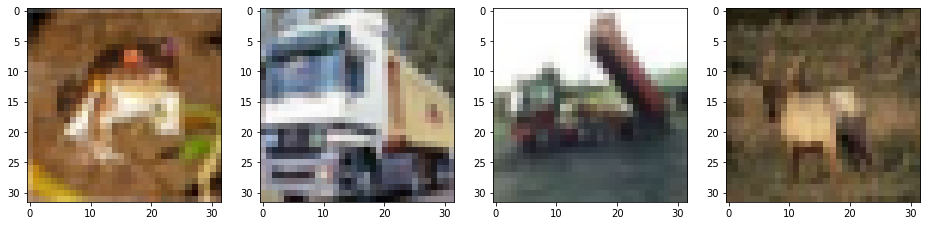

In [3]:
#####################################################################################
# Preview sample training image data

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Sample training images and its labels: ' + str([x[0] for x in y_train[0:4]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:4]]))
f, b = plt.subplots(1, 4)
f.set_size_inches(16, 6)

for j in range(4):
    image = X_train[j]
    b[j].imshow(image)
plt.show()

In [4]:
###################################################################################
# Load Training and Testing data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  # Normalize pixel value of an image
X_test /= 255

print("Training Shape Data:")
print(X_train.shape)
print(y_train.shape)
print("Testing Shape Data:")
print(X_test.shape)
print(y_test.shape)

Training Shape Data:
(50000, 32, 32, 3)
(50000, 10)
Testing Shape Data:
(10000, 32, 32, 3)
(10000, 10)


In [6]:
#####################################################################################
# Creating CNN Model for Image Classification

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2, validation_split=0.2)
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
model.summary()

# Save the model if needed
# model.save("question_1_model")

print(model.metrics_names)
print(score)

Epoch 1/100
1250/1250 - 5s - loss: 1.5972 - accuracy: 0.4568 - val_loss: 1.3844 - val_accuracy: 0.5284
Epoch 2/100
1250/1250 - 5s - loss: 1.1970 - accuracy: 0.5878 - val_loss: 1.2810 - val_accuracy: 0.5759
Epoch 3/100
1250/1250 - 5s - loss: 0.9922 - accuracy: 0.6572 - val_loss: 1.5799 - val_accuracy: 0.5094
Epoch 4/100
1250/1250 - 5s - loss: 0.8318 - accuracy: 0.7126 - val_loss: 1.1322 - val_accuracy: 0.6335
Epoch 5/100
1250/1250 - 5s - loss: 0.6809 - accuracy: 0.7619 - val_loss: 1.1480 - val_accuracy: 0.6322
Epoch 6/100
1250/1250 - 5s - loss: 0.5637 - accuracy: 0.8015 - val_loss: 1.0978 - val_accuracy: 0.6750
Epoch 7/100
1250/1250 - 5s - loss: 0.4520 - accuracy: 0.8427 - val_loss: 1.2037 - val_accuracy: 0.6558
Epoch 8/100
1250/1250 - 5s - loss: 0.3435 - accuracy: 0.8814 - val_loss: 1.2112 - val_accuracy: 0.6594
Epoch 9/100
1250/1250 - 5s - loss: 0.2755 - accuracy: 0.9037 - val_loss: 1.3907 - val_accuracy: 0.6489
Epoch 10/100
1250/1250 - 5s - loss: 0.2151 - accuracy: 0.9247 - val_loss:

Plotting training loss



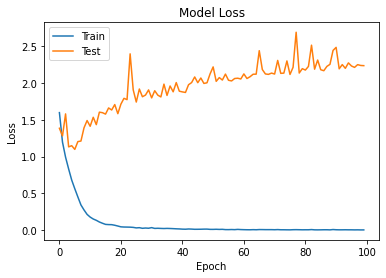

In [7]:
#####################################################################################
# Plotting training loss

print('Plotting training loss\n')
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plotting training accuracy



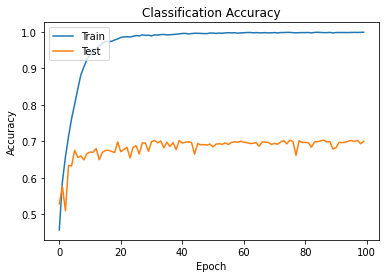

In [8]:
#####################################################################################
# Plotting training accuracy

print('Plotting training accuracy\n')
plt.plot(history.history['accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()